## Prerequisites

Run this cell to prepare the environment. This step is obligatory.

In [ ]:
!pip install retentioneering

In [1]:
import retentioneering
import pandas as pd

The full text of [Funnel](https://doc.retentioneering.com/stable/doc/user_guides/funnel.html#funnel) user guide is available on the retentioneering website.

# Funnel

## Loading data

In [2]:
from retentioneering import datasets

stream = datasets.load_simple_shop()

## Basic example

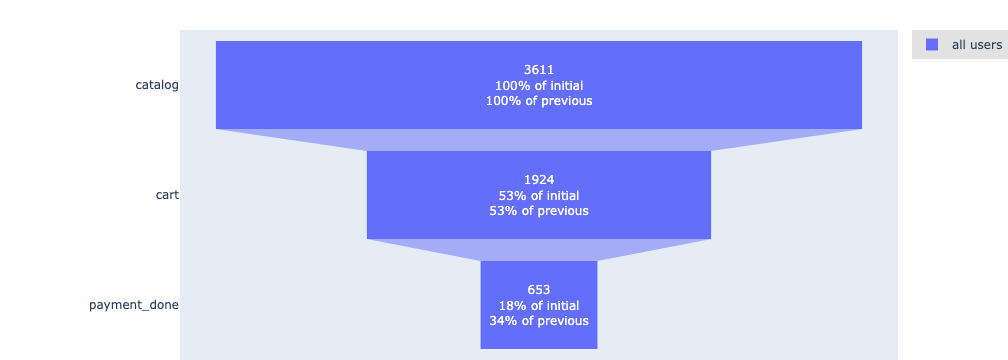

In [3]:
stream.funnel(stages=['catalog', 'cart', 'payment_done']);

## Funnel stages


## Stage grouping

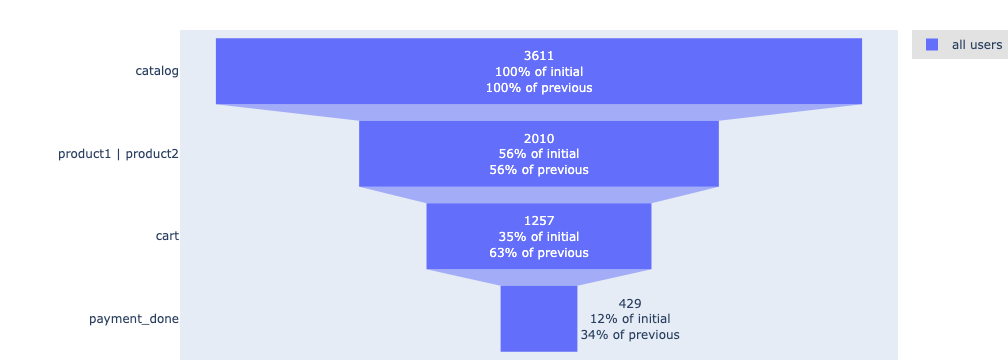

In [4]:
stream.funnel(stages=['catalog', ['product1', 'product2'], 'cart', 'payment_done']);

Stage names
-----------

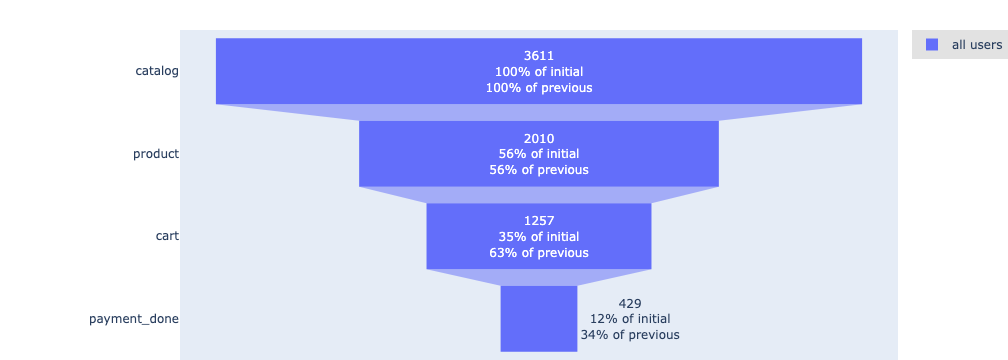

In [5]:
stream.funnel(
        stages=['catalog', ['product1', 'product2'], 'cart', 'payment_done'],
        stage_names=['catalog', 'product', 'cart', 'payment_done']
    );

## User segments

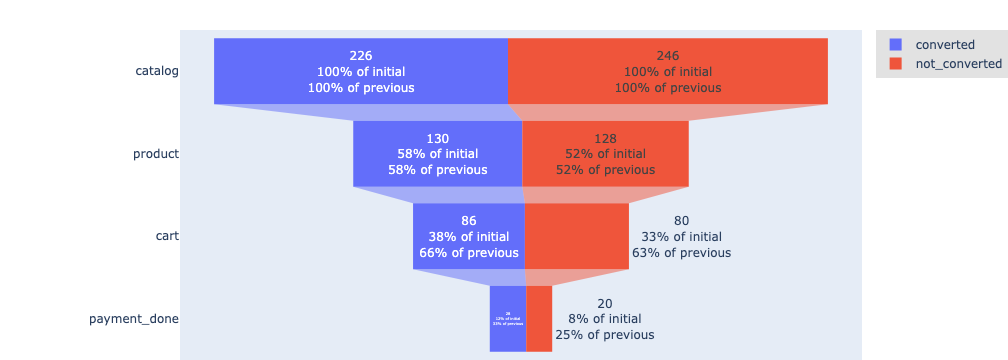

In [6]:
 stream_df = stream.to_dataframe()

# pandas.Series, indicies are user_ids, values are months when users appear
cohorts = stream_df.groupby('user_id').first()['timestamp'].dt.strftime('%Y-%m')

segment1 = cohorts[cohorts == '2020-01'].index
segment2 = cohorts[cohorts == '2020-02'].index
stream.funnel(
    stages=['catalog', ['product1', 'product2'], 'cart', 'payment_done'],
    stage_names=['catalog', 'product', 'cart', 'payment_done'],
    funnel_type='closed',
    segments=(segment1, segment2),
    segment_names=('converted', 'not_converted')
);

## Using a separate instance


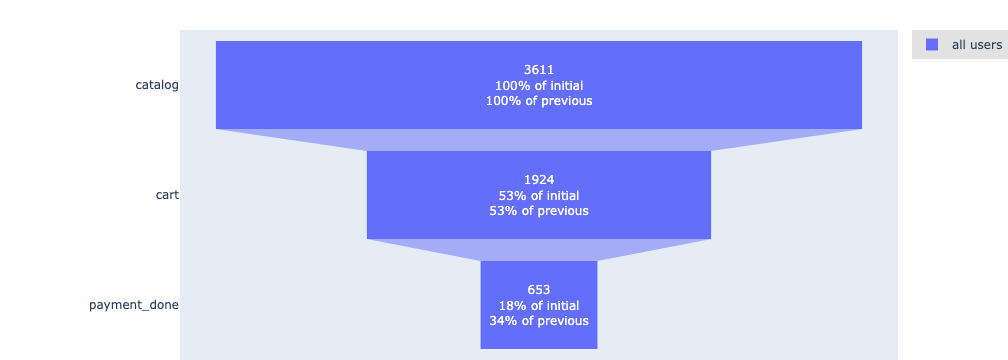

In [7]:
from retentioneering.tooling.funnel import Funnel

funnel = Funnel(eventstream=stream)
funnel.fit(stages=['catalog', 'cart', 'payment_done'])
funnel.plot()

## Common tooling properties

### values

In [8]:
stream.funnel(
        stages=['catalog', 'cart', 'payment_done'],
        show_plot=False
    ).values

unique_users  %_of_initial  %_of_total
segment_name stages                                              
all users    catalog               3611        100.00      100.00
             cart                  1924         53.28       53.28
             payment_done           653         33.94       18.08

### params

In [9]:
stream.funnel(
    stages=['catalog', 'cart', 'payment_done'],
    show_plot=False
).params

{'stages': [['catalog'], ['cart'], ['payment_done']],
 'stage_names': ['catalog', 'cart', 'payment_done'],
 'funnel_type': 'closed',
 'segments': [[219483890,
   964964743,
   629881394,
   629881395,
   495985018,
   207580913,
   729416583,
   24427596,
   76119122,
   465044817,
   613604495,
   145194414,
   574105483,
   272031070,
   633220717,
   754782579,
   792179492,
   279769797,
   416817498,
   456870964,
   836120732,
   63911040,
   592380978,
   431785094,
   697551750,
   801210206,
   778558635,
   839112589,
   428990197,
   753512589,
   861613226,
   462119278,
   968444450,
   120396150,
   190361938,
   754402650,
   962011991,
   256992321,
   789409015,
   817407344,
   681182808,
   689417587,
   650470979,
   572097469,
   961828452,
   822706158,
   900001552,
   421598096,
   819945505,
   285842033,
   515655507,
   966708329,
   831095347,
   882028530,
   648029228,
   256305752,
   668944101,
   855532383,
   265477765,
   842347550,
   666790097,
   6